# EDA- Housing Dataset

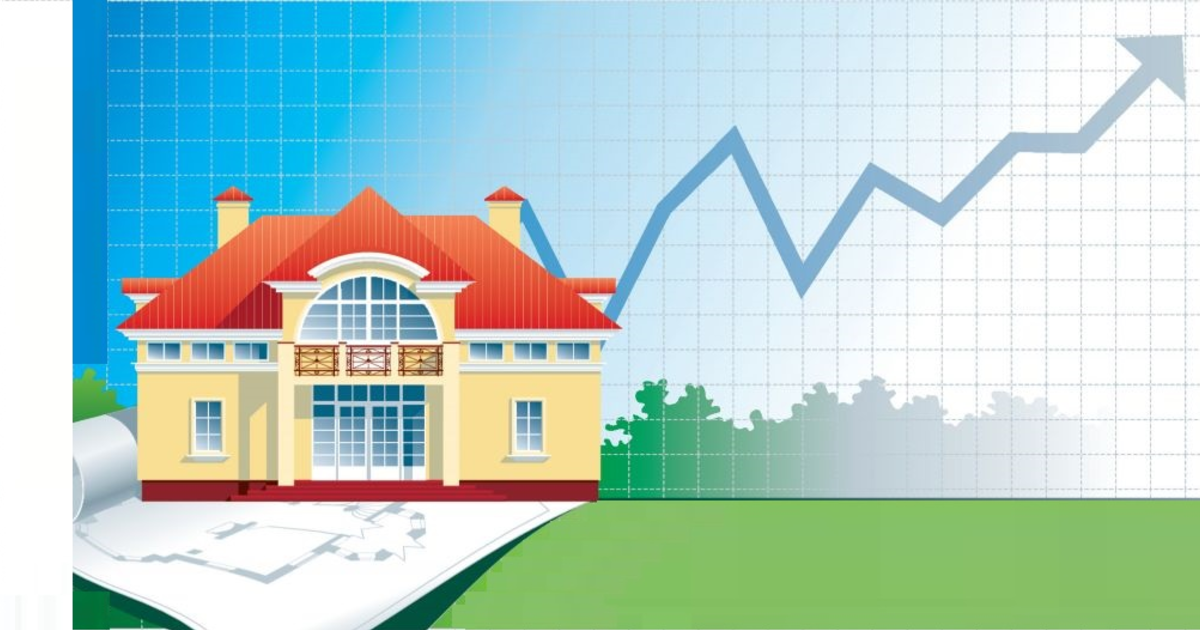

## Introduction

The house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 1980.

These are housing Values in Suburbs of Boston.


## Variables used in the dataset

| |  Variables  | Type    | Meaning   | 
|---:|:-------------|:-----------|:------|
| 1 | CRIM  | Numeric       | per capita crime rate by town  | 
| 2 | ZN  | Numeric    | proportion of residential land zoned for lots over 25,000 sq.ft.  | 
| 3 | INDUS  | Numeric    | proportion of non-retail business acres per town   |
| 4 | CHAS  | Categorical    | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)   | 
| 5 | NOX  | Numeric    | nitric oxides concentration (parts per 10 million)   | 
| 6 | RM  | Numeric    | average number of rooms per dwelling   | 
| 7 | AGE  | Numeric    | proportion of owner-occupied units built prior to 1940   | 
| 8 | DIS  | Numeric    | weighted distances to five Boston employment centres   | 
| 9 | RAD  | Categorical    | index of accessibility to radial highways   | 
| 10 | TAX  | Numeric    | full-value property-tax rate per $10,000   |      
| 11 | PTRATIO  | Numeric    | pupil-teacher ratio by town   | 
| 12 | B  | Numeric    | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town   |
| 13 | LSTAT  | Numeric    | % lower status of the population  | 
| 14 | MEDV  | Numeric    | median value of owner occupied homes   | 


## **Objective**:
          Understand the Dataset , finding missing values , skewness and otliers and data visualisation using different plots
    

## Import Libraries

In [1]:
# import libraries for analyis
import pandas as pd    #  for analysis
import numpy as np   # for numerical calculation
import matplotlib.pyplot as plt   # for visualisation
import seaborn as sns          # for visualisation
%matplotlib inline
import missingno as msno    # show missing values in bar plot
from scipy.stats import boxcox,skew   # for calculate skewness   
pd.pandas.set_option('display.max_columns',None)  # display maximum columns

## Basic Exploration

**Housing Dataset and peek of data in the dataframe.**

In [2]:
# Reading the dataset and assign name to columns
housing = pd.read_csv('housing.csv',sep ='\s+', names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])


In [3]:
# getting 1st five rows in the form of dataframe
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# getting last five rows in the form of dataframe
housing.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


**Dimensions of the dataframe**

In [5]:
housing.shape  # give number of observations (rows) and 14 variables(columns)

(506, 14)

In this dataset 506 observations (rows) and 14 variables(columns)

| Columns | Rows |
| --- |--- |  
| 14 | 506 |

**converting variable from numeric to category**

In [6]:
# converting CHAS and RAD variable from numeric to category
housing = housing.astype({'CHAS':'category','RAD': 'category'})

**Information about the schema**

In [7]:
# getting information about dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


**Statistical metrics of each column**

In [8]:
# get statistical summary of the data
housing.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# get the unique values in each variables
housing.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

## Checking Missing values

In [10]:
# function gives total no of missing value in each column
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
# function gives percentage of missing value in each column
housing.isnull().mean() * 100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

<AxesSubplot:>

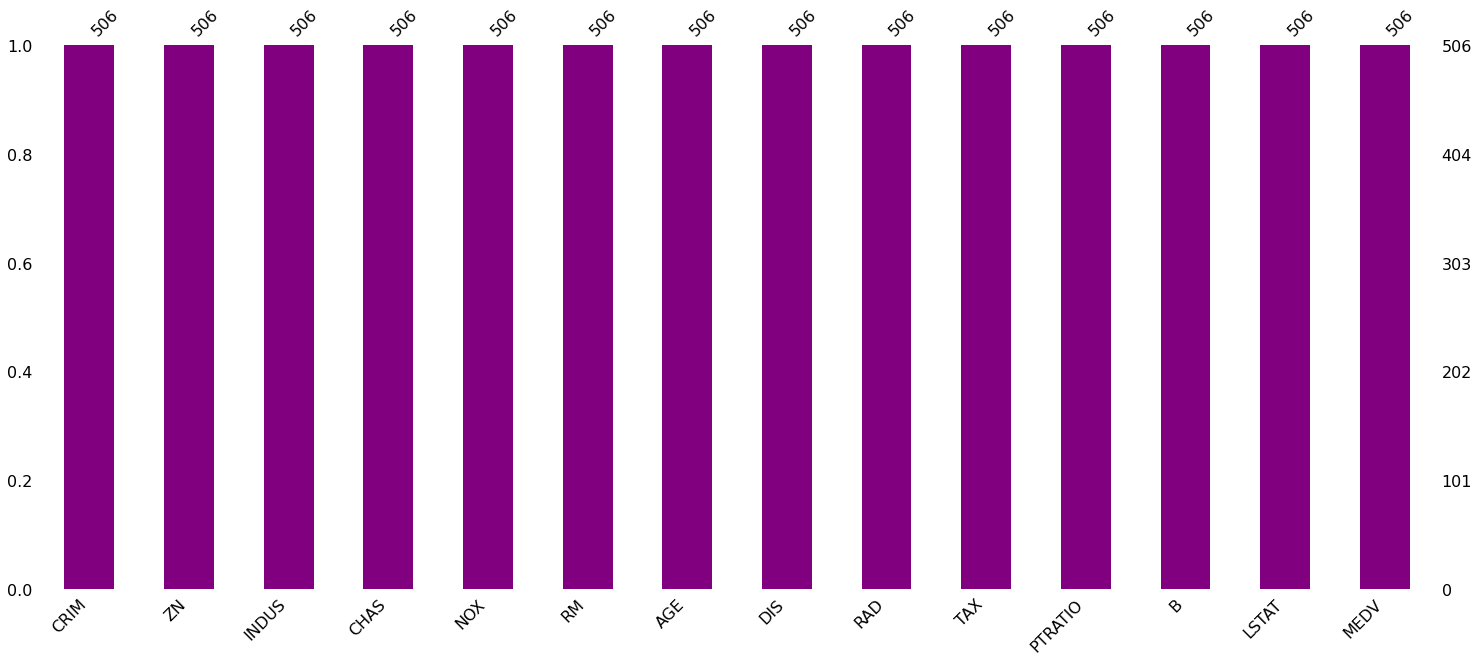

In [12]:
msno.bar(housing, color='purple')   # show missing values in form of bar plot

Here , from above exploration , get that , no missing values in the dataset 

## Erroneous/wrong values

In [13]:
# getting number of zeros in a column
count = (housing['ZN'] == 0).sum()
count

372

**In ZN column large amount of zeros , total 372 zeros , so better to drop this column**

In [14]:
housing = housing.drop(['ZN'],axis = 1)  # drop the ZN column

In [15]:
housing.describe() # see sumamry after dropping column

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation of  Variables

In [16]:
house_corr = housing.corr()

<AxesSubplot:>

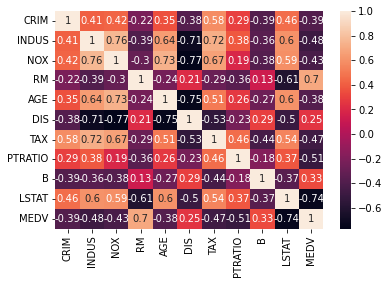

In [17]:
# sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(house_corr,annot=True)

By looking at the correlation matrix we can see that 'RM' has a strong positive correlation with 'MEDV'(0.7) whereas 'LSTAT' has a high negative correlation with 'MEDV'(-0.74).

## Distribution of Numeric Variables

In [18]:
#Storing all the numeric data type column in variable named numeric
numeric = housing.select_dtypes(include='number').columns

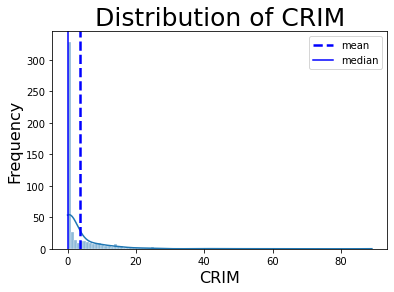

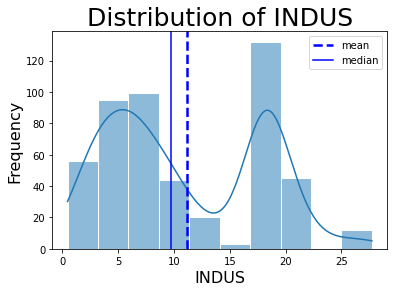

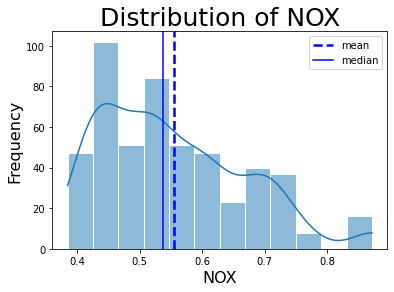

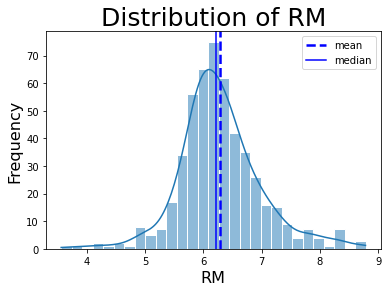

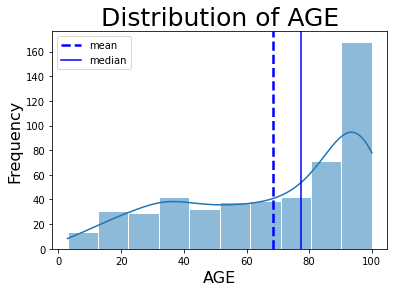

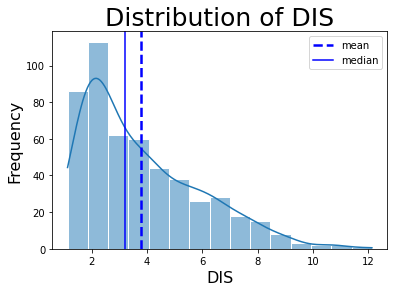

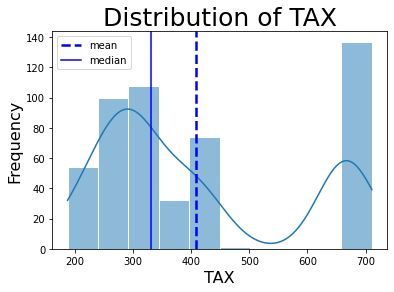

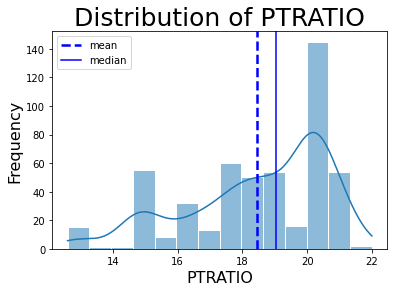

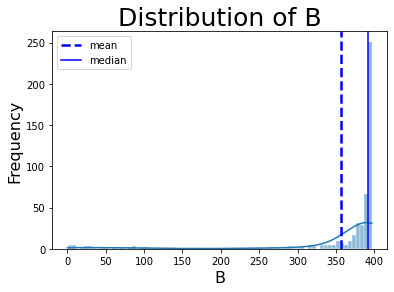

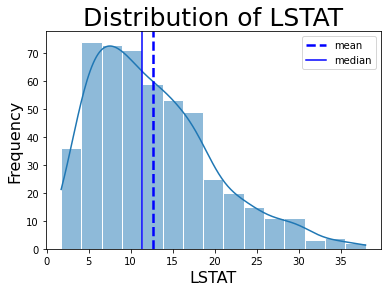

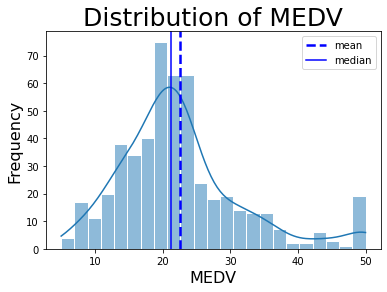

In [19]:
#Plotting histplot for analysing the distribution
for i in numeric:     # for loop for Plotting histplot
    fig, ax = plt.subplots(1,1)   # fig size
    sns.histplot(housing[i],kde=True,edgecolor = 'white')  # hist plot
    plt.title('Distribution of %s'%(i), fontsize=25)  # give title
    plt.axvline(x=housing[i].mean(),ls='--',lw=2.5, color='blue',label='mean')  # show mean
    plt.axvline(x=housing[i].median(), color='blue',label='median')  # show median
    plt.legend()   # show legend
    plt.xlabel(i, fontsize=16)   # x label
    plt.ylabel('Frequency', fontsize=16)  # y label

Most of the variables are not symmetrical . They have skewness  , To make symmetrical required Transformation

##  Outliers For Numerical Variables

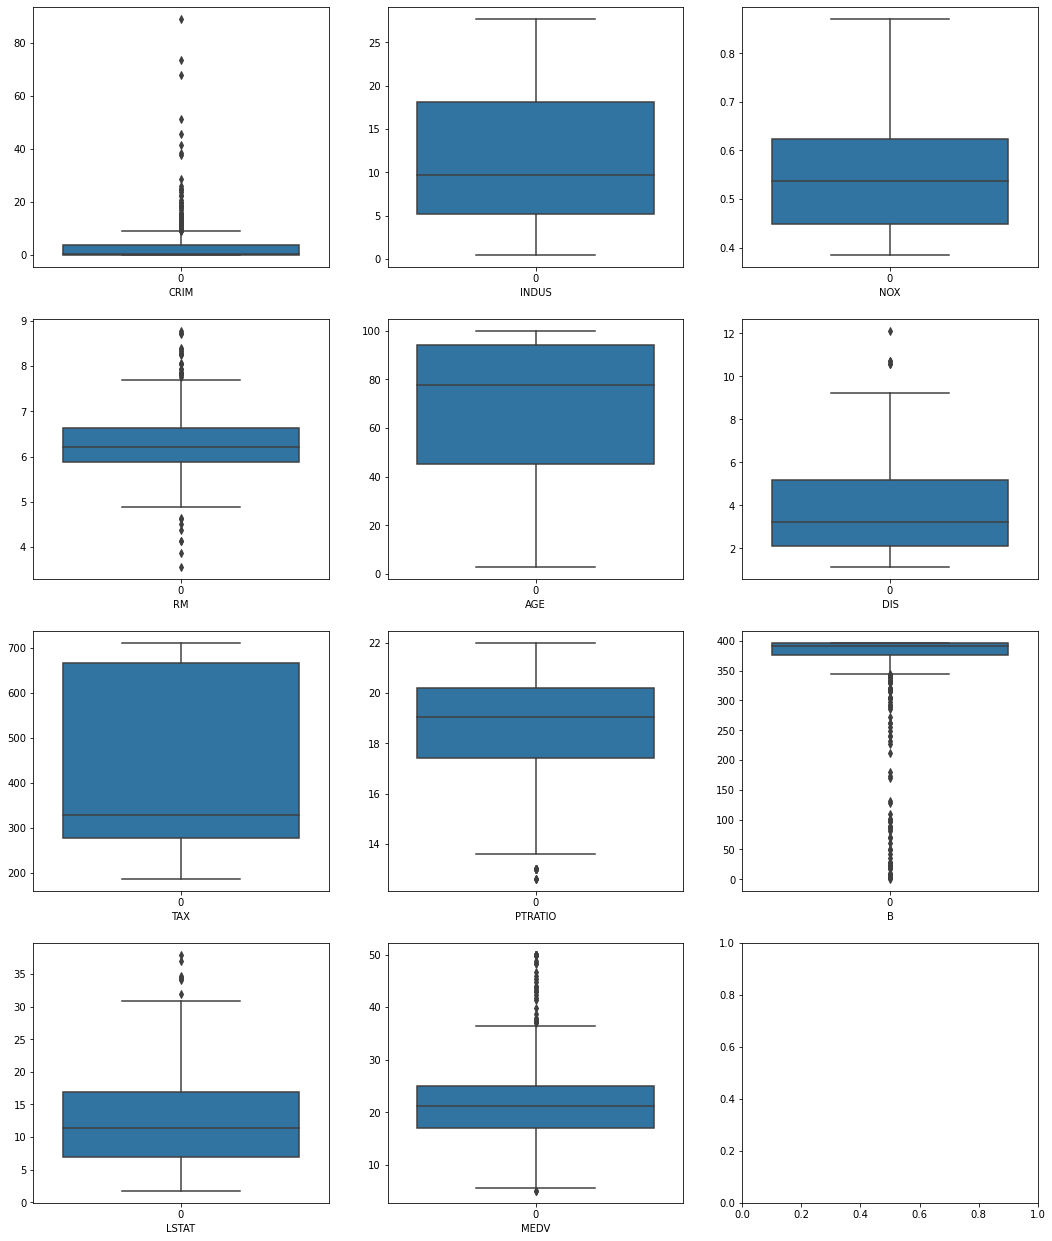

In [20]:
### Plotting boxplot for analysing the outliers
_,ax=plt.subplots(4,3,figsize=(18,22))    # get subplots fig size
for i in range (len(numeric)):          # for loop  to get subplots
    sns.boxplot(data=housing[numeric[i]],ax=ax[i//3][i%3]).set(xlabel = numeric[i])  # box plot

Most of the variables are outliers .  To make symmetrical then outliers are removed . So required Transformation

## Checking Skewness

In [21]:
housing[numeric].skew()   # find skewness

CRIM       5.223149
INDUS      0.295022
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

<AxesSubplot:>

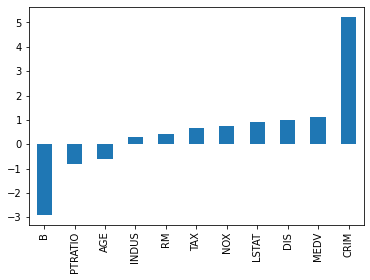

In [22]:
housing.skew(numeric_only=True).sort_values().plot(kind='bar')    # skewness in the form of bar plot

**Skewness** refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. Skewness of the data can be measure by the skew() function.

**The rule for skewness of data:**

|   | Range | Type |
| --- | --- |--- |  
| 1 | -0.5 to 0.5 | Symetrical data |
| 2 |  -1 to -0.5 or 0.5 to 1 | Moderately skewed |
| 3 | less than -1 or greater than 1 | Highly skewed |

The skewness of all the variables are as following,

| Column | Type of skewness |
| --- | --- | 
| **CRIM**    | Highly skewed |
| **INDUS**   | Symetrical |
| **NOX**     | Moderately skewed |
| **RM**      | Symetrical |
| **AGE**     | Moderately skewed |
| **DIS**     | Moderately skewed |
| **TAX**     | Moderately skewed |
| **PTRATIO** | Moderately skewed |
| **B**       | Highly skewed |
| **LSTAT**   | Moderately skewed |
| **MEDV**    | Moderately skewed |

Above,  Some variables are moderately and highly skewed , So to remove skewness we do various transformation techniques.
 to get normally distributed(symmetrical) variable data.

### Transformation

Transformation techniques like (log , square root, cube root, boxcox ) to get normal distribution.

**For CRIM**

In [23]:
housing.CRIM.skew() # to get skewness

5.223148798243851

Not get skewness between -0.5 and 0.5  so use sqrt transformation

**SQRT Transformation**

In [24]:
# sqrt transformstion technique to get normal distribution
housing['crim_sqrt'] = np.sqrt(housing['CRIM'])
# sns.distplot(housing['crim_sqrt'])

In [25]:
housing['crim_sqrt'].skew() # get skewness

2.024382103123676

Not get skewness between -0.5 and 0.5  so use log transformation

**log Transformation**

In [26]:
# distribution of CRIM using log tranformatin in distribution plot
housing['crim_log'] = np.log(housing['CRIM'])

In [27]:
housing['crim_log'].skew() # get skewness

0.4059344988496048

using log transformation get skewness between -0.5 and 0.5 which get normal distribution

**For INDUS**

In [28]:
housing.INDUS.skew() # get skewness

0.29502156787351164

get skewness between -0.5 and 0.5 which get normal distribution

**For NOX**

In [29]:
housing.NOX.skew()

0.7293079225348787

Not  get skewness between -0.5 and 0.5 so use log transformation

**log Transformation**

In [30]:
# distribution of NOX using log tranformatin in distribution plot
housing['nox_log'] = np.log(housing['NOX'])

In [31]:
housing['nox_log'].skew() # get skewness

0.3577796083043403

using log transformation get skewness between -0.5 and 0.5 which get normal distribution

**For RM**

In [32]:
housing.RM.skew() # get skweness

0.40361213328874385

get skewness between -0.5 and 0.5 which get normal distribution

**For AGE**

In [33]:
housing.AGE.skew() # get skewness

-0.5989626398812962

Not get skewness between -0.5 and 0.5 so use log transformation

**log Transformation**

In [34]:
# distribution of AGE using log tranformatin in distribution plot
housing['age_log'] = np.log(housing['AGE'])

In [35]:
housing['age_log'].skew() # get skewness

-1.6756550438247213

Not get skewness between -0.5 and 0.5 so use sqrt transformation

**SQRT Transformation**

In [36]:
# distribution of AGE using sqrt tranformatin in distribution plot
housing['age_sqrt'] = np.sqrt(housing['AGE'])

In [37]:
housing['age_sqrt'].skew() # get skweness

-0.9774659289270576

Not get skewness between -0.5 and 0.5 so use box cox transformation

**Boxcox Transformation**

In [38]:
housing['age_boxcox']=boxcox(housing.AGE)[0]  # boxcox transformation

In [39]:
housing['age_boxcox'].skew()  # get skewness

-0.4251406231041932

using box cox transformation get skewness between -0.5 and 0.5 which get normal distribution

**For DIS**

In [40]:
housing.DIS.skew() # get skewness

1.0117805793009007

Not get skewness between -0.5 and 0.5 so use log transformation

**log Transformation**

In [41]:
# distribution of DIS using log tranformatin in distribution plot
housing['dis_log'] = np.log(housing['DIS'])

In [42]:
housing['dis_log'].skew() # get skewness

0.15273013181129969

using log transformation get skewness between -0.5 and 0.5 which get normal distribution

**For Tax**

In [43]:
housing.TAX.skew() # get skewness

0.669955941795016

No get skewness between -0.5 and 0.5  so use log transformation

**log Transformation**

In [44]:
# distribution of TAX using log tranformatin in distribution plot
housing['tax_log'] = np.log(housing['TAX'])

In [45]:
housing['tax_log'].skew()  # get skewness

0.330556653549998

using log transformation get skewness between -0.5 and 0.5 which get normal distribution

**For PTRATIO**

In [46]:
housing.PTRATIO.skew() # get skewness

-0.8023249268537809

Not get skewness between -0.5 and 0.5 so use log transformation 

**log Transformation**

In [47]:
# distribution of PTRATIO using log tranformatin in distribution plot
housing['ptratio_log'] = np.log(housing['PTRATIO'])


In [48]:
housing['ptratio_log'].skew() # get skewness

-1.015625274497949

Not get skewness between -0.5 and 0.5  so use sqrt transformation

**SQRT Transformation**

In [49]:
# distribution of PTRATIO using sqrt tranformatin in distribution plot
housing['ptratio_sqrt'] = np.sqrt(housing['PTRATIO'])

In [50]:
housing['ptratio_sqrt'].skew() # get skewness

-0.9060761594127507

Not get skewness between -0.5 and 0.5  so use box cox transformation

**boxcox Transformation**

In [51]:
housing['PTRATIO_boxcox'] = boxcox(housing.PTRATIO)[0]   # boxcox transformation

In [52]:
housing['PTRATIO_boxcox'].skew()  # get skewness

-0.2229237459839964

using box cox transformation get skewness between -0.5 and 0.5 which get normal distribution

**For B**

In [53]:
housing.B.skew() # get skewnss

-2.8903737121414492

Not get skewness between -0.5 and 0.5 so use log transformation

**log Transformation**

In [54]:
# distribution of B using log tranformatin in distribution plot
housing['b_log'] = np.log(housing['B'])

In [55]:
housing['b_log'].skew()  # get skewness

-4.826998303936602

Not get skewness between -0.5 and 0.5 so use square root transformation

**SQRT Transformation**

In [56]:
# distribution of B using sqrt tranformatin in distribution plot
housing['b_sqrt'] = np.sqrt(housing['B'])

In [57]:
housing['b_sqrt'].skew() # get skweness

-3.3562187558155143

Not get skewness between -0.5 and 0.5 so use cube root transformation

**CURT Transformation**

In [58]:
# distribution of B using cube root tranformatin in distribution plot
housing['b_cbrt'] = np.cbrt(housing['B'])

In [59]:
housing['b_cbrt'].skew()  # get skewness

-3.6337804353831067

Not get skewness between -0.5 and 0.5  so use of box cox transformation

**boxcox Transformation**

In [60]:
housing['B_boxcox'] = boxcox(housing.B)[0]  # boxcox transformation

In [61]:
housing['B_boxcox'].skew() # get skewness

-1.931634584880783

After different transformatin technique B varables not get normal distribution

**For LSTAT**

In [62]:
housing.LSTAT.skew() # get skewness

0.9064600935915367

Not get skewness between -0.5 and 0.5 , use furthrt log transformation

**Log Transformation**

In [63]:
# distribution of LSTAT using log tranformatin in distribution plot
housing['lstat_log'] = np.log(housing['LSTAT'])

In [64]:
housing['lstat_log'].skew() # for getting skewness

-0.3202323581479543

using log transformation get skewness between -0.5 and 0.5 which get normal distribution

**For MEDV**

In [65]:
housing.MEDV.skew() # see skewdness

1.1080984082549072

Not get skewness between -0.5 and 0.5 , use further log tranformation

**Log Transformation**

In [66]:
# use of log transformation 
housing['medv_log'] = np.log(housing['MEDV'])

In [67]:
housing['medv_log'].skew()  # use this function to see skewness

-0.33032129530987864

using log transformation get skewness between -0.5 and 0.5 which get normal distribution

## Checking Skewness After Transformation

In [68]:
house_trans = ['crim_log','INDUS','nox_log','RM','dis_log','tax_log','lstat_log','medv_log','age_boxcox','PTRATIO_boxcox','B_boxcox']

In [69]:
housing[house_trans].skew()   # find Skewness After Transformation

crim_log          0.405934
INDUS             0.295022
nox_log           0.357780
RM                0.403612
dis_log           0.152730
tax_log           0.330557
lstat_log        -0.320232
medv_log         -0.330321
age_boxcox       -0.425141
PTRATIO_boxcox   -0.222924
B_boxcox         -1.931635
dtype: float64

Here only **B** variable remain skewed after transformation

<AxesSubplot:>

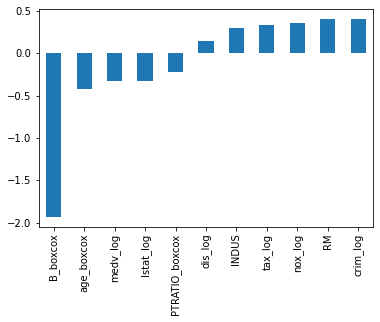

In [70]:
housing[house_trans].skew().sort_values().plot(kind='bar')  # Skewness  After Transformation the form of bar plot

Here only B variable remain skewed after transformation and have large skewness

##  Distribution of Variables After Transformation

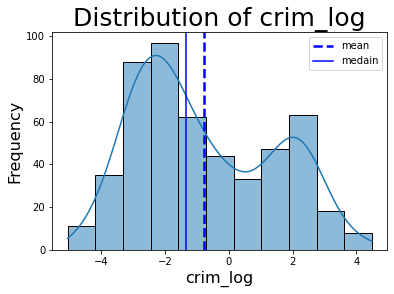

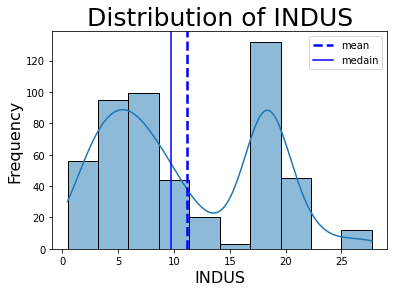

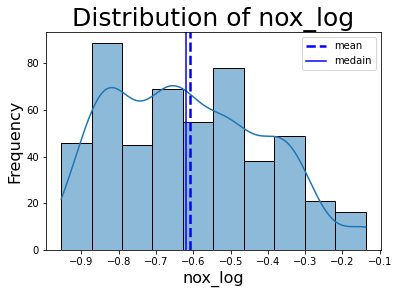

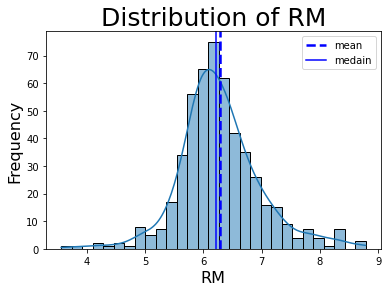

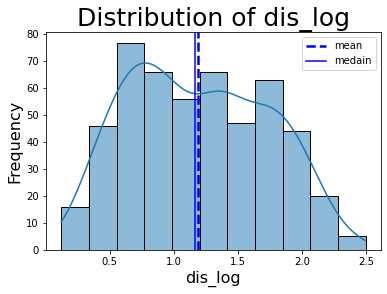

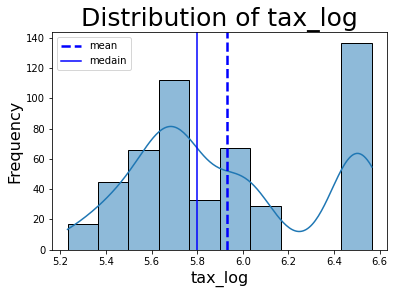

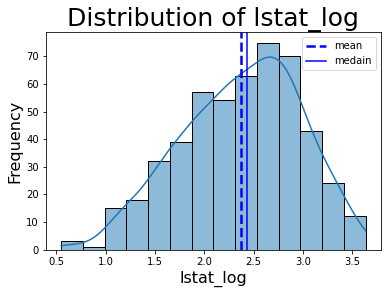

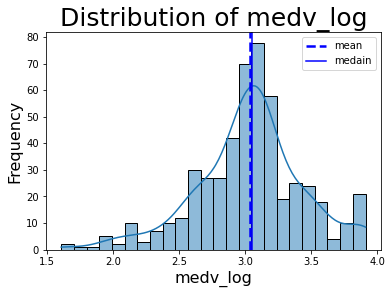

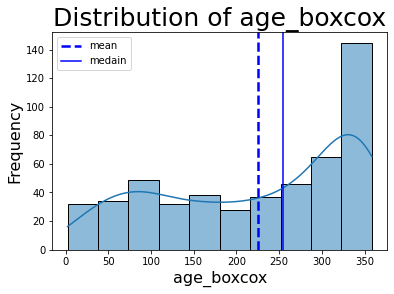

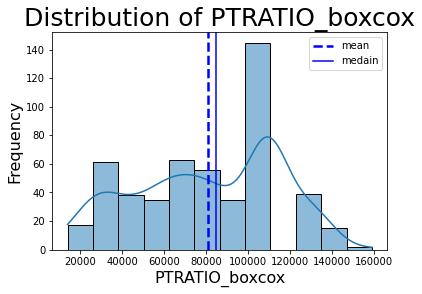

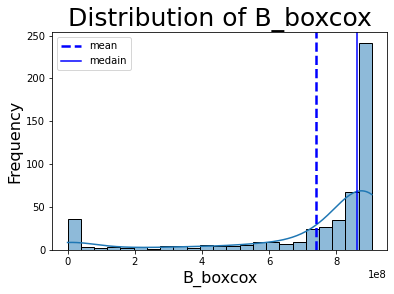

In [71]:
#Plotting histplot for analysing the distribution
for i in house_trans:          # for loop to get subplots
    fig, ax = plt.subplots(1,1)        # fig size 
    sns.histplot(housing[i],kde=True)   # histoplot 
    plt.title('Distribution of %s'%(i), fontsize=25)     # title
    plt.axvline(x=housing[i].mean(),ls='--',lw=2.5, color='blue',label='mean')  # show mean
    plt.axvline(x=housing[i].median(), color='blue',label='medain')  # show median
    plt.legend()   # show legend
    plt.xlabel(i, fontsize=16)  # x label
    plt.ylabel('Frequency', fontsize=16)  # y label

Here After transformation , B variable remain skew i.e not  symmetrical ,   All other variables become symmetrical  

## Outliers After Transformation

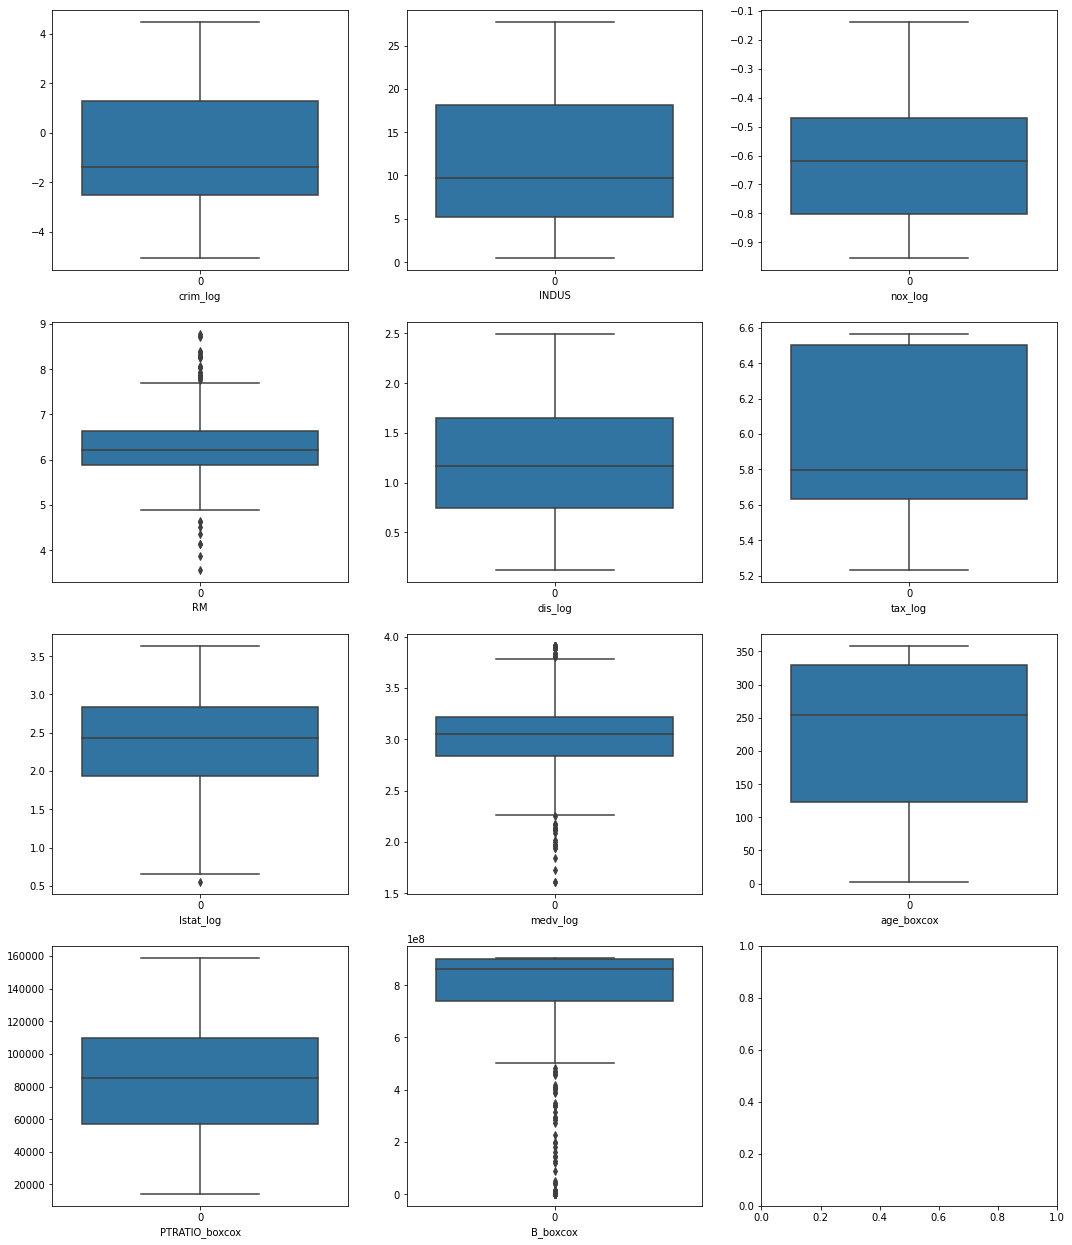

In [72]:
#Plotting boxplot for analysing the outliers
_,ax=plt.subplots(4,3,figsize=(18,22))  # fig size
for i in range (len(house_trans)):   # for loop to get outliers
    sns.boxplot(data=housing[house_trans[i]],ax=ax[i//3][i%3]).set(xlabel = house_trans[i])   # box plot  

After Transformation , RM, medv_log, B_boxcox   have outliers

In [73]:
category = ['CHAS','RAD']  # list of category variables

##  Distribution of Categorical variables

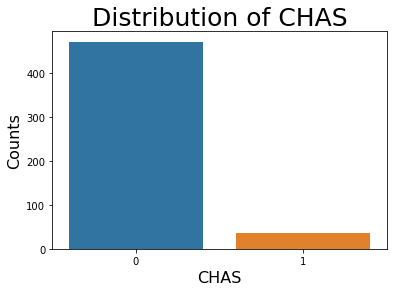

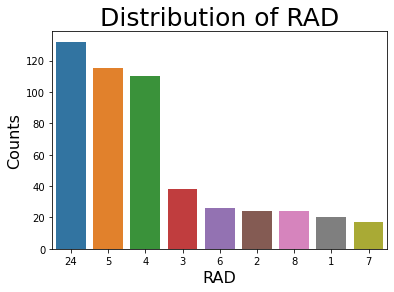

In [74]:
#Plotting countplot for analysing the distribution of categorical variables
for i in category:   # get count plot  
    fig, ax = plt.subplots(1,1)  # fig size
    sns.countplot(x=housing[i], order = housing[i].value_counts().index)  # countplot
    plt.title('Distribution of %s'%(i), fontsize=25)   # title
    plt.xlabel(i, fontsize=16)  # x label
    plt.ylabel('Counts', fontsize=16)  # label

## Independent Variables Vs Dependent Variable(MEDV)

<AxesSubplot:xlabel='CRIM', ylabel='MEDV'>

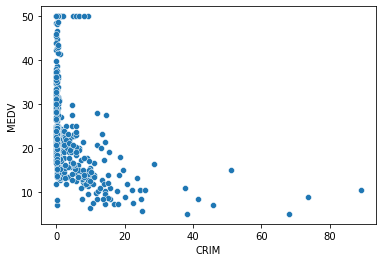

In [75]:
# use of scatter plot to see distribution
sns.scatterplot(x="CRIM",y='MEDV', data =housing)

By the above result, CRIM is not Negatively affecting the MEDV.

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

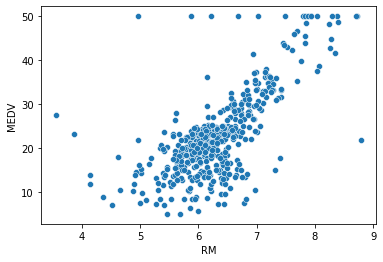

In [76]:
# use of scatter plot to see distribution
sns.scatterplot(x="RM",y='MEDV', data =housing)

By the above result, RM is Positively affecting the MEDV.

Text(0.5, 1.0, 'Relationship between LSTAT_log and MEDV')

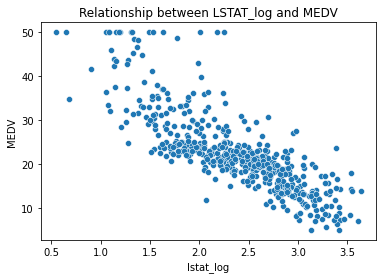

In [77]:
# AFTER transformation  can we plot such graphs
sns.scatterplot(x=housing['lstat_log'],y=housing['MEDV'], data =housing).set_title('Relationship between LSTAT_log and MEDV')

By the above result, lstat_log is Negatively affecting the MEDV.